In [181]:
from tqdm.notebook import tqdm, trange

from foobah.gcode import GCODE
from foobah.utils import preview_png
from foobah.procedures import LineThreshold, Triangularizator, SquareWaver, TSPScribble

import PIL
import PIL.Image
import PIL.ImageFilter

from IPython.display import display

from random import choice

379 504


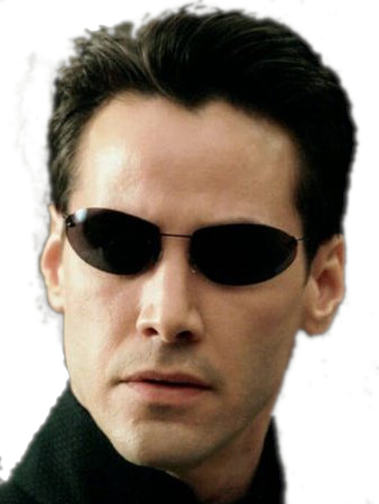

In [182]:
basename = "neo"

scale = 0.89
# scale = 1.4
# image_name = "images/moonface.png"
# image_name = "images/einstein.jpg"
# image_name = "images/david-bowie.jpg"
# image_name  = "images/scary_penguin.webp"
# image_name = "images/portrait_1.jpg"
# image_name = "images/simplex_noise_difference_clouds.png"
# image_name = "images/dafoe.jpg"
# image_name = "images/neo.jpg"
image_name = "images/neo_no_bg.jpg"


image = PIL.Image.open(image_name)

image = image.resize((int(image.width / scale), int(image.height / scale)), PIL.Image.ANTIALIAS)
# image = image.filter(PIL.ImageFilter.EDGE_ENHANCE_MORE)
# image = image.filter(PIL.ImageFilter.SMOOTH_MORE)
# image = image.filter(PIL.ImageFilter.CONTOUR)
# image = image.filter(PIL.ImageFilter.DETAIL)
# image = image.filter(PIL.ImageFilter.EDGE_ENHANCE)
# image = image.filter(PIL.ImageFilter.EDGE_ENHANCE_MORE)
# image = image.filter(PIL.ImageFilter.SMOOTH_MORE)

# image = image.rotate(-90, expand=True)

image = image.convert("RGB")

width = image.width
height = image.height
print(width, height)

display(image)

In [183]:
gcode = GCODE(basename, feedrate=1500, scale=(0, image.width, 0, image.height))
gcode.draw_boundaries()

In [184]:
pens = [
    LineThreshold(image=image, gcode=gcode, angle=22, threshold=0.8, step_size=1.75),
    
    Triangularizator(image=image, gcode=gcode, step_size=4, pow_exp=4, noise=0.75),
    
    SquareWaver(image=image, gcode=gcode, step_size=5, gamma_ish=0.91, intensity_threshold=0.5, min_dy=1.15),
    
    TSPScribble(image=image, gcode=gcode, step_size=2, noise=0.75, pow_exp=6),
]

In [185]:
# path = pens[-1].paint(bounds=(200, 200, 250, 250))
# path = pens[-1].paint(bounds=(100, 100, 200, 175))

In [186]:
grid_size = 15

for y in trange(0, image.height, grid_size):    
    for x in range(0, image.width, grid_size):
#         break
#         print(x, y)
#         if image.width - x < grid_size: continue
#         if image.height - y < grid_size: continue
            
        pen = choice(pens)
        pen.paint(bounds=(x, y, x + grid_size, y + grid_size))
        
#         gcode.square(x, y, x + grid_size, y + grid_size)

  0%|          | 0/34 [00:00<?, ?it/s]

In [187]:
gcode.pen_up()
gcode.flush()

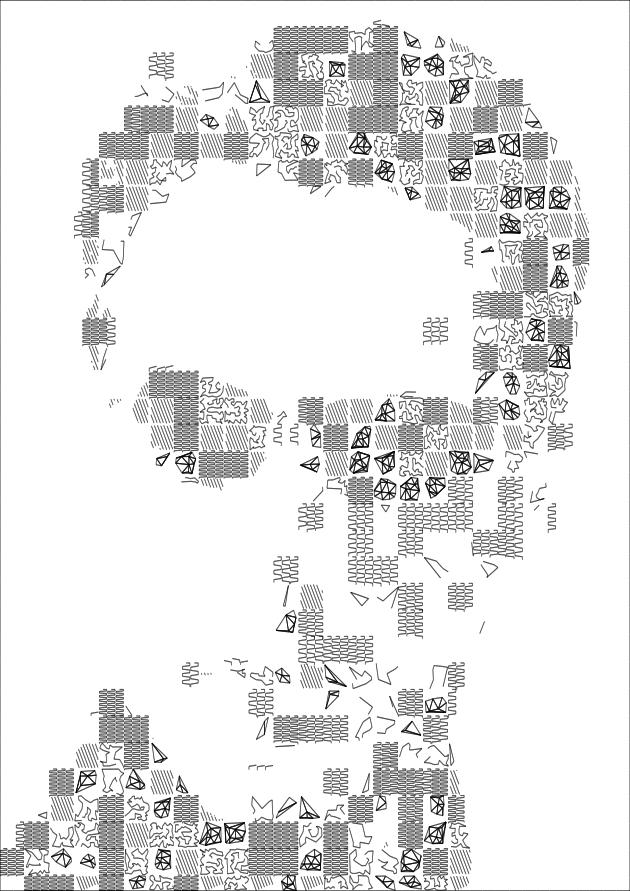

In [188]:
preview_png(basename, scale=3)